In [1]:
# 標準ライブラリ
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph

import re
import japanize_matplotlib
from matplotlib.animation import FuncAnimation, PillowWriter
import math

In [2]:
hard_sales = hs.load_hard_sales(normalize7=True)

In [5]:
p_sales = hs.pivot_sales(hard_sales)
p_sales = p_sales.resample('Y').sum()
p_sales

hw,3DS,DC,DS,GB,GBA,GC,N64,NS2,NSW,NeoGeoP,...,PSP,SATURN,Vita,WS,Wii,WiiU,XB360,XBOne,XSX,Xbox
report_date,,,,,,,,,,,,,,,,,,,,,
1998-12-31,0.0,270095.0,0.0,1058864.0,0.0,0.0,395547.0,0.0,0.0,40638.0,...,0.0,5442.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-12-31,0.0,968639.0,0.0,2606884.0,0.0,0.0,740509.0,0.0,0.0,141736.0,...,0.0,0.0,0.0,684517.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-12-31,0.0,397661.0,0.0,2077410.0,0.0,0.0,267741.0,0.0,0.0,117929.0,...,0.0,0.0,0.0,508263.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-12-31,0.0,287247.0,0.0,528362.0,4245686.0,929832.0,72550.0,0.0,0.0,14968.0,...,0.0,0.0,0.0,298348.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-12-31,0.0,4966.0,0.0,109226.0,3358439.0,1036405.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,220300.0,0.0,0.0,0.0,0.0,0.0,329584.0
2003-12-31,0.0,0.0,0.0,8948.0,3591601.0,1012694.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,46366.0,0.0,0.0,0.0,0.0,0.0,95226.0
2004-12-31,0.0,0.0,1056428.0,0.0,2552922.0,617783.0,0.0,0.0,0.0,0.0,...,349283.0,0.0,0.0,600.0,0.0,0.0,0.0,0.0,0.0,34932.0
2005-12-31,0.0,0.0,3939096.0,0.0,1251834.0,304895.0,0.0,0.0,0.0,0.0,...,2194008.0,0.0,0.0,0.0,0.0,0.0,84490.0,0.0,0.0,12810.0
2006-12-31,0.0,0.0,8966021.0,0.0,451045.0,100796.0,0.0,0.0,0.0,0.0,...,1969363.0,0.0,0.0,0.0,989118.0,0.0,205977.0,0.0,0.0,0.0


In [17]:
data_2017 = p_sales.loc[str(2017)].iloc[0]
data_2017 = data_2017[data_2017 > 0 ]
data_2017

hw
3DS      1827131.0
NSW      3407158.0
PS4      1935247.0
Vita      396207.0
WiiU       21817.0
XBOne      14664.0
Name: 2017-12-31 00:00:00, dtype: float64

In [49]:
data_2017.index

Index(['3DS', 'NSW', 'PS4', 'Vita', 'WiiU', 'XBOne'], dtype='object', name='hw')

In [50]:
data_2017.name.year

2017

In [51]:
def plot_pie_chart_by_year(s:pd.Series):

    s_data = s[s > 0]
    plt.figure(figsize=(8, 8))
    plt.pie(s_data, labels=s_data.index, autopct='%1.1f%%')
    plt.title(f'Hard Share in {s_data.name.year}')
    plt.show()

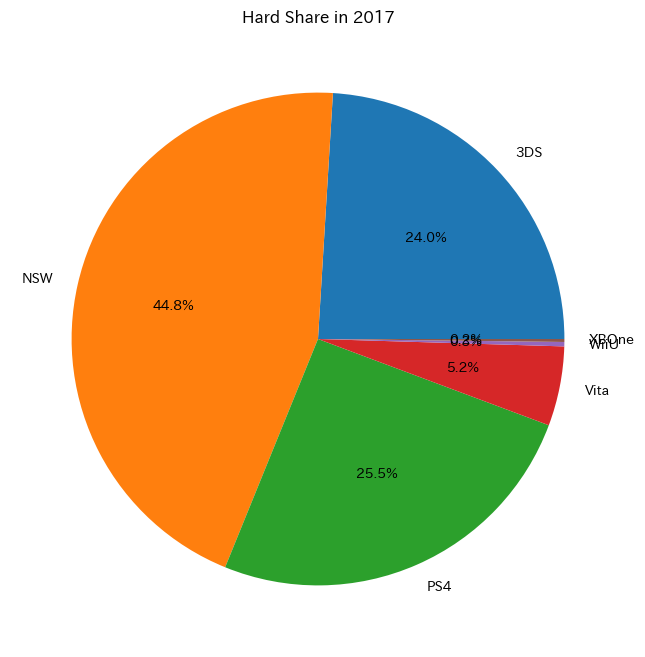

In [44]:
plot_pie_chart_by_year(data_2017)

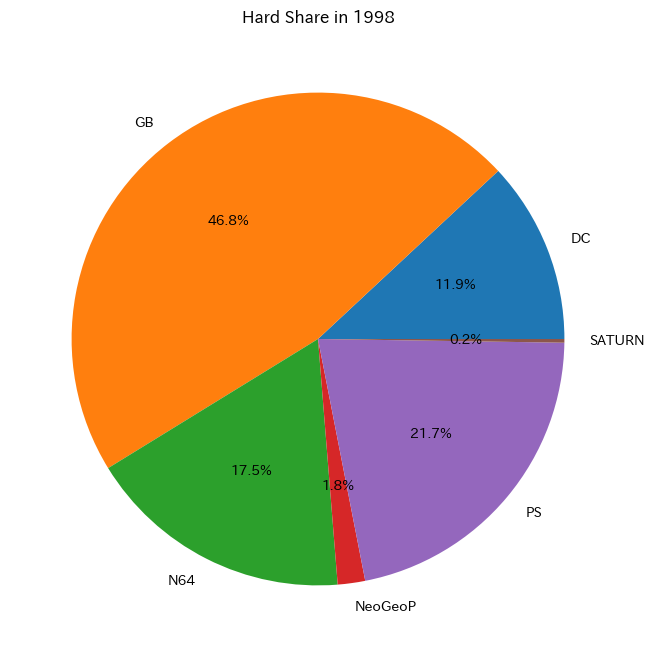

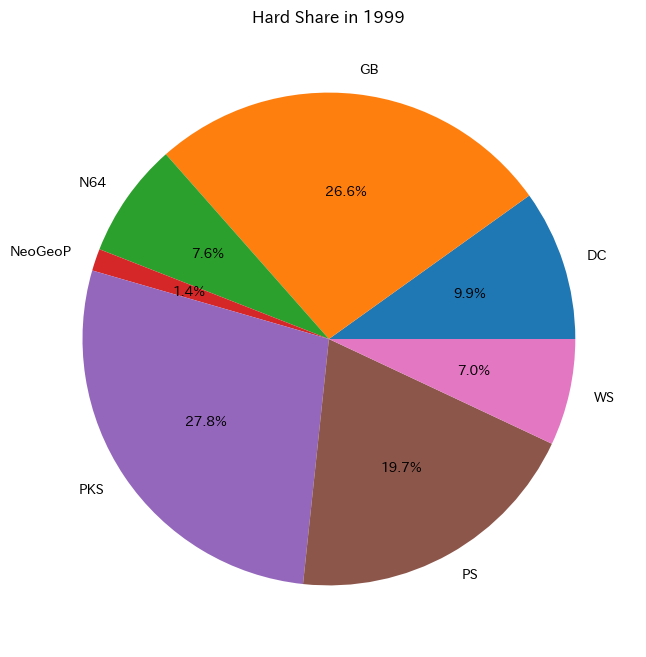

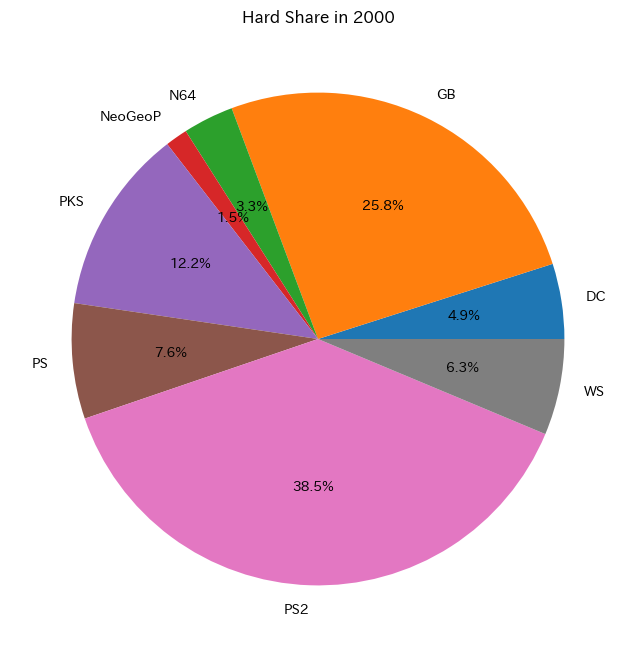

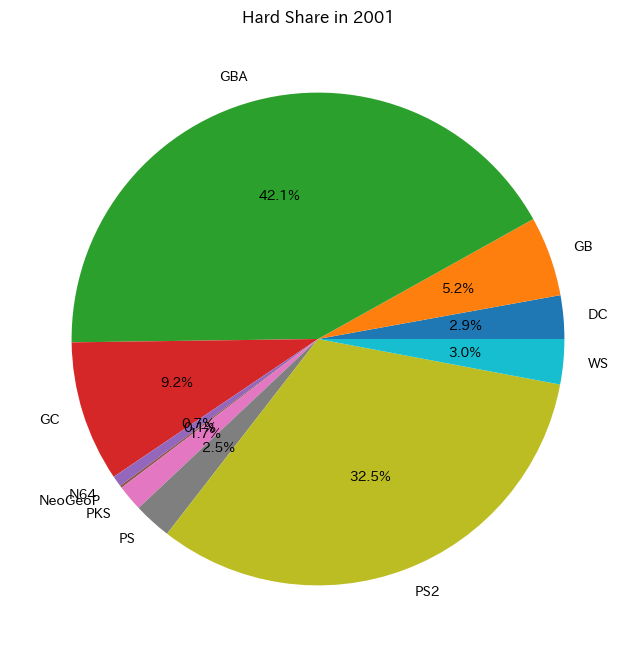

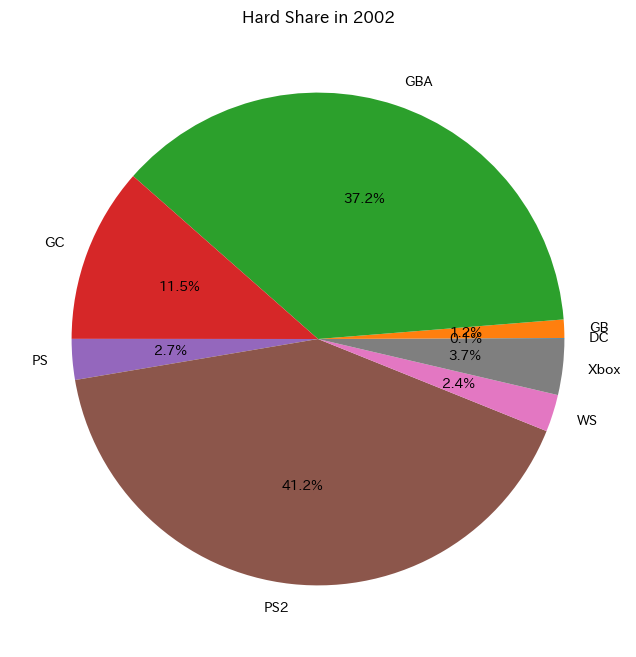

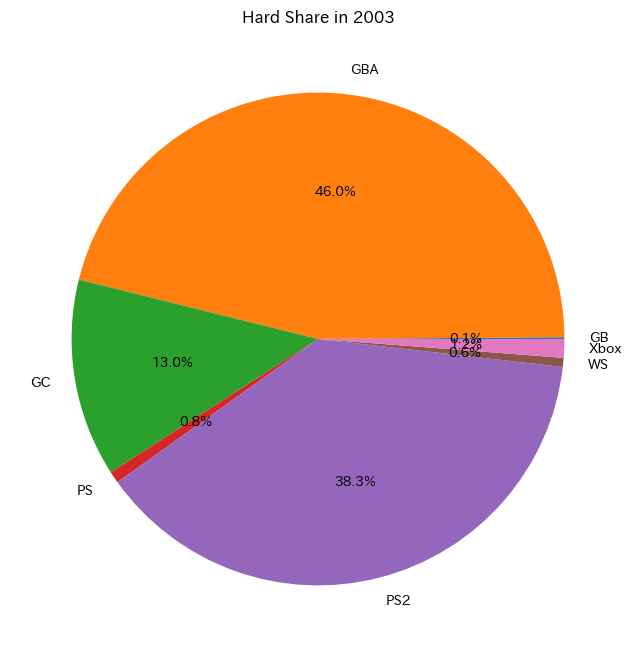

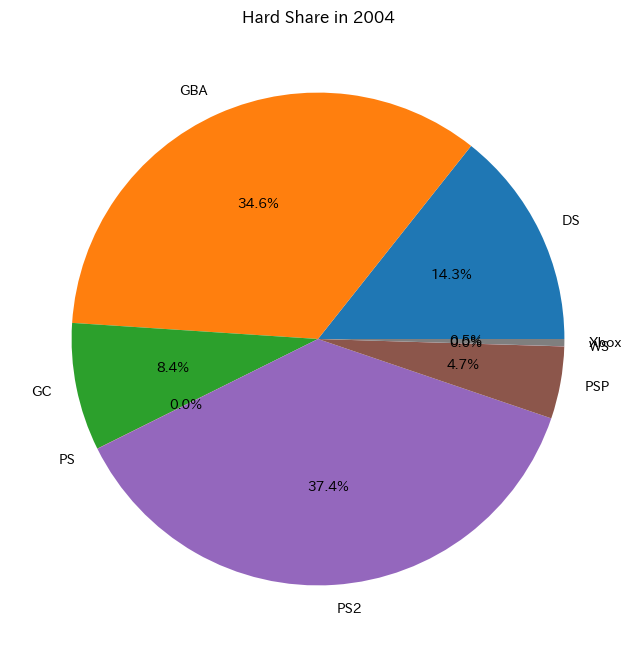

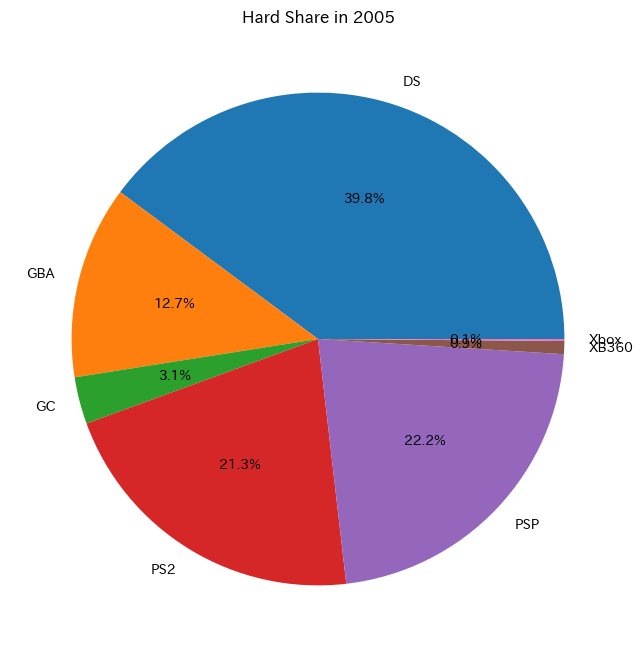

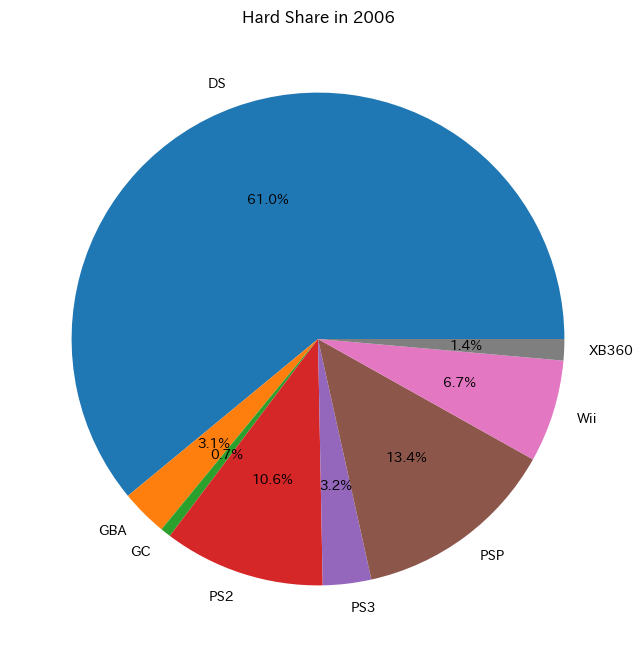

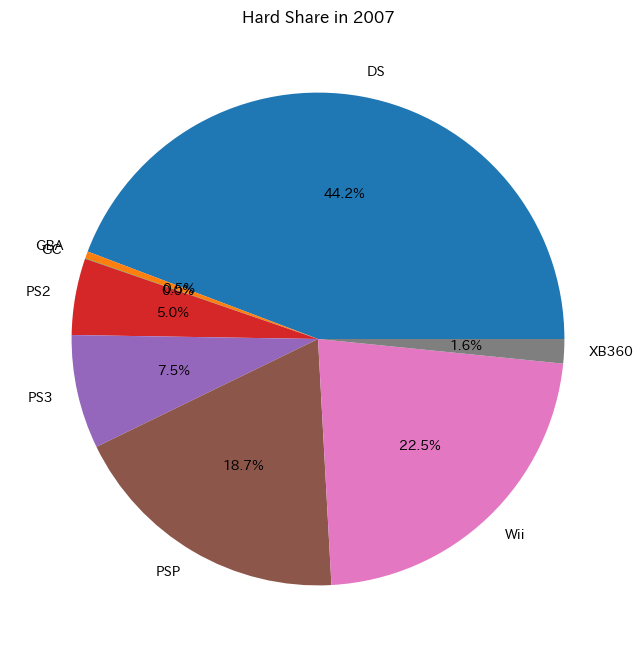

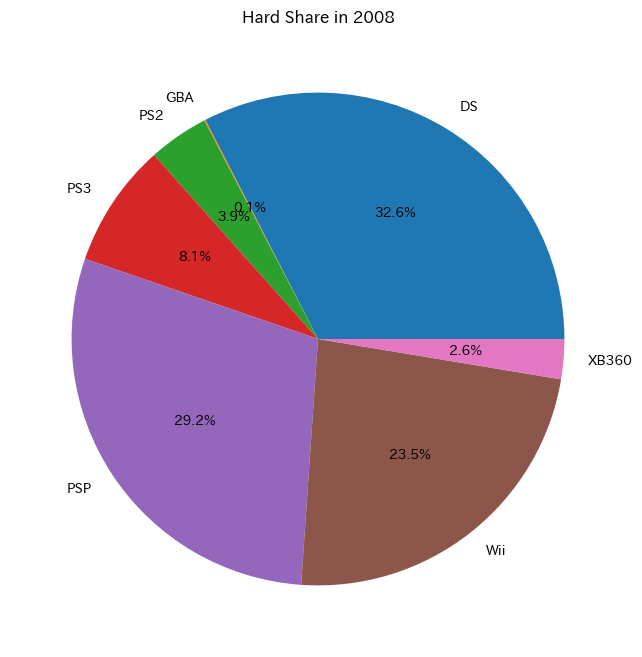

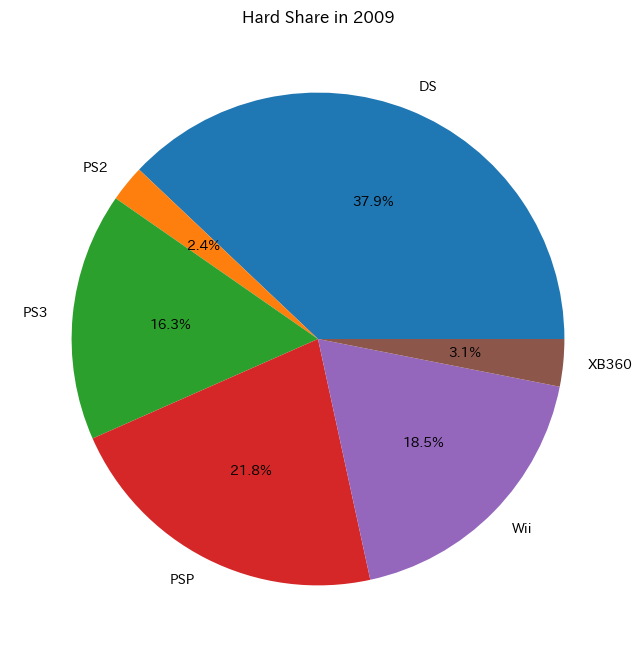

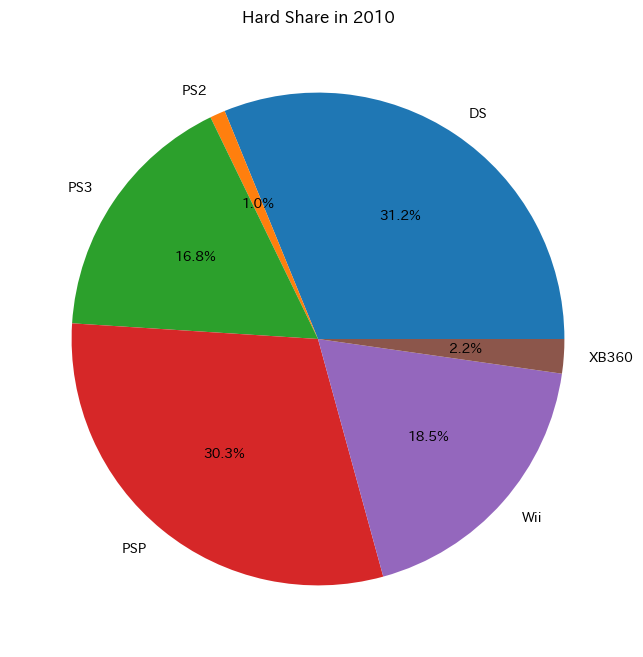

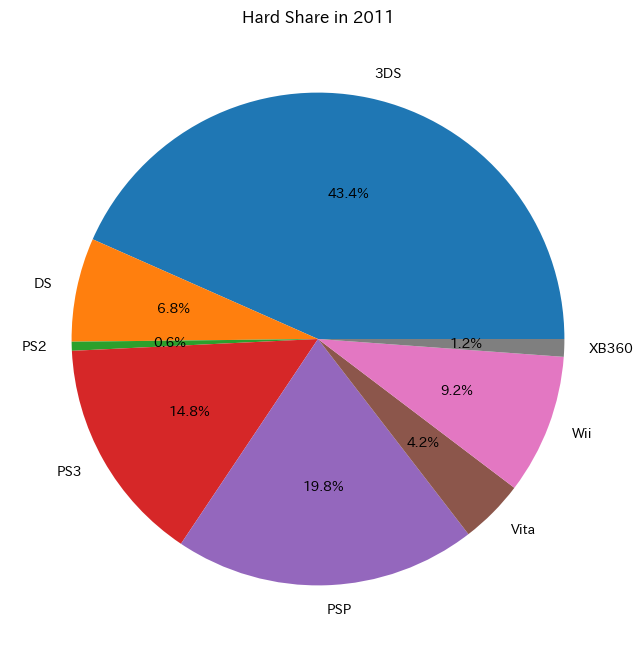

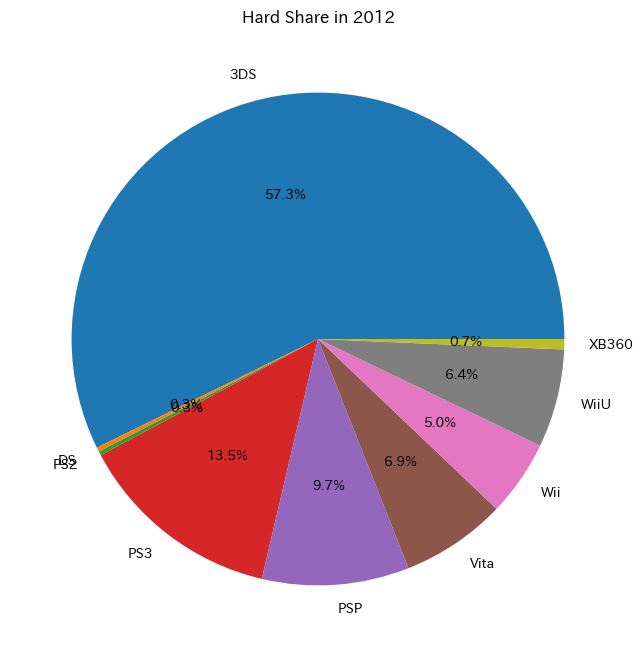

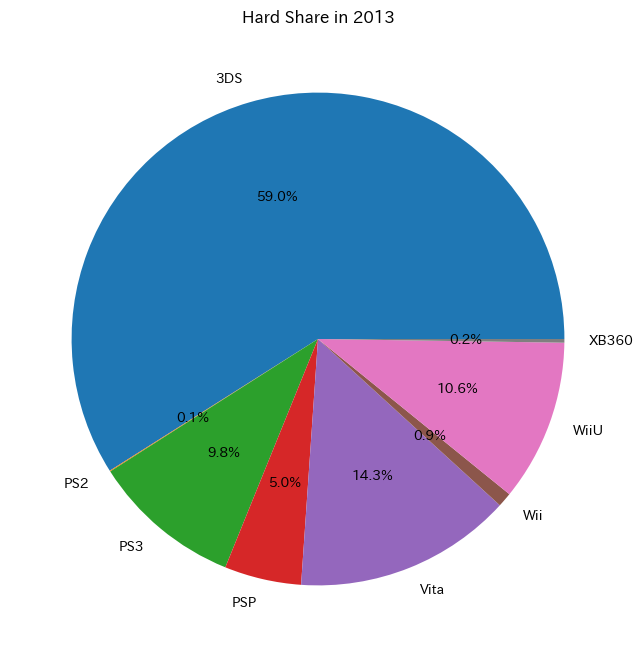

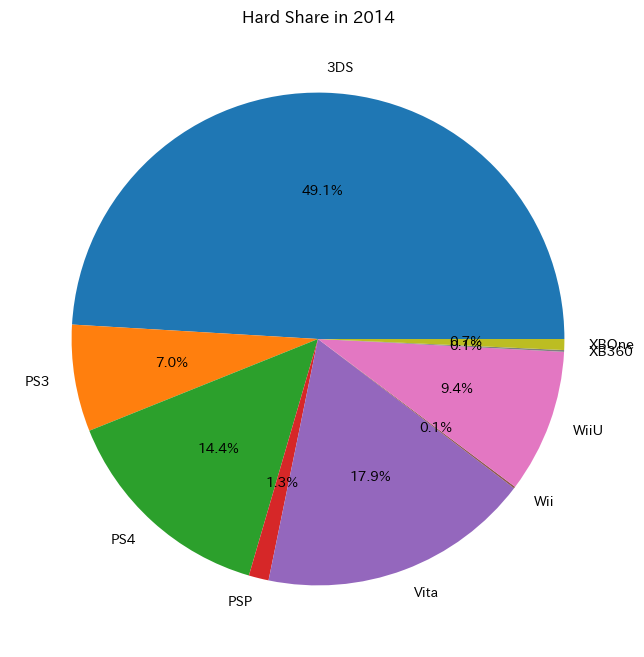

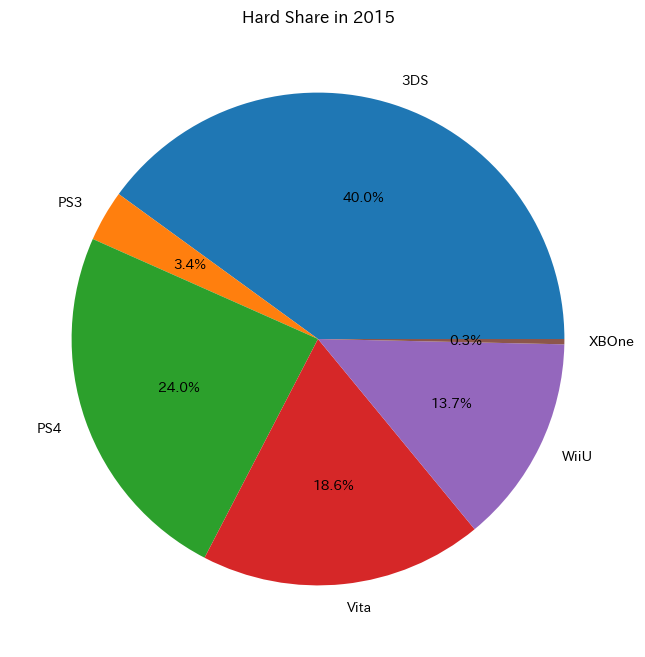

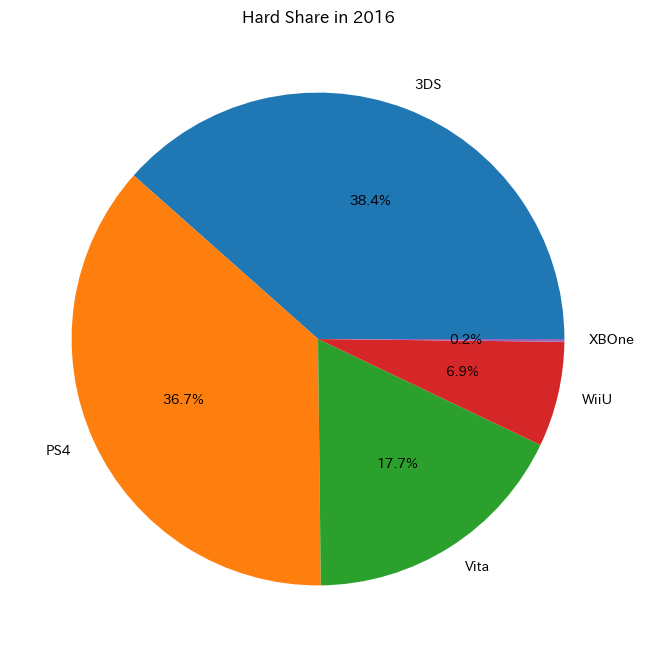

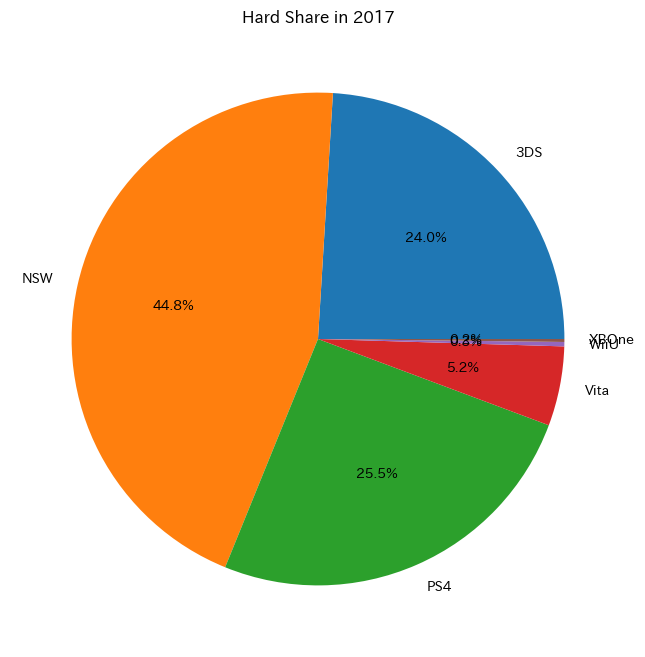

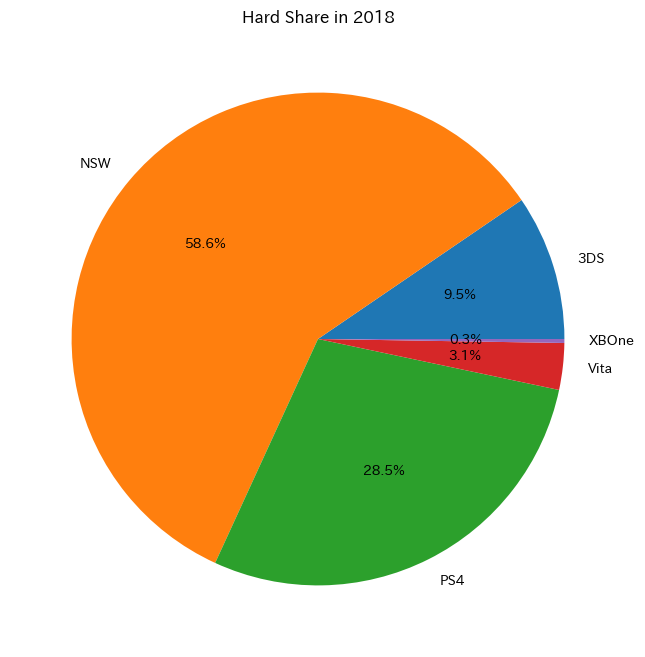

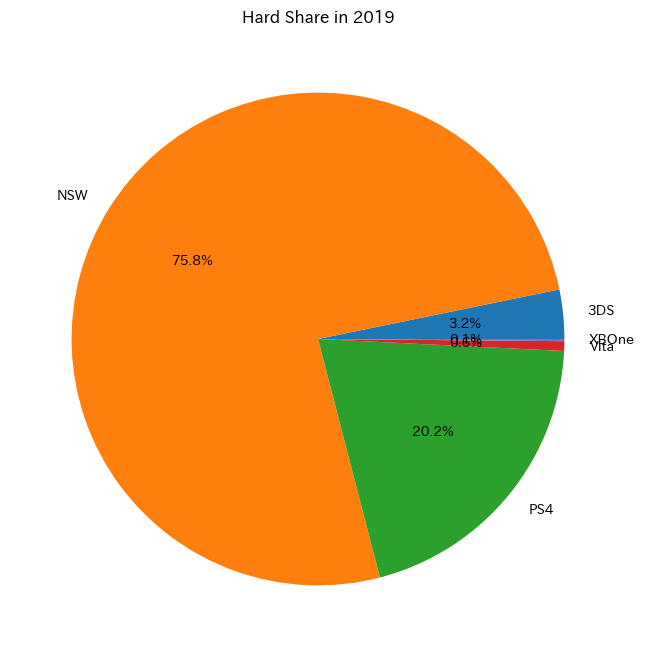

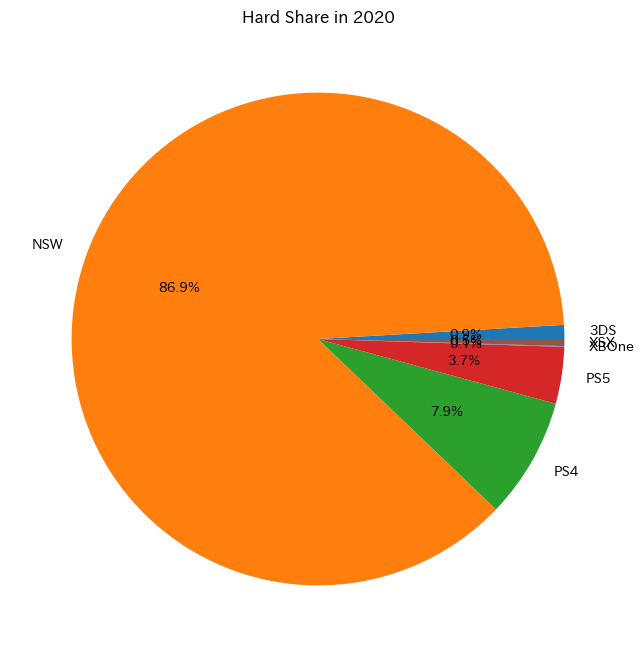

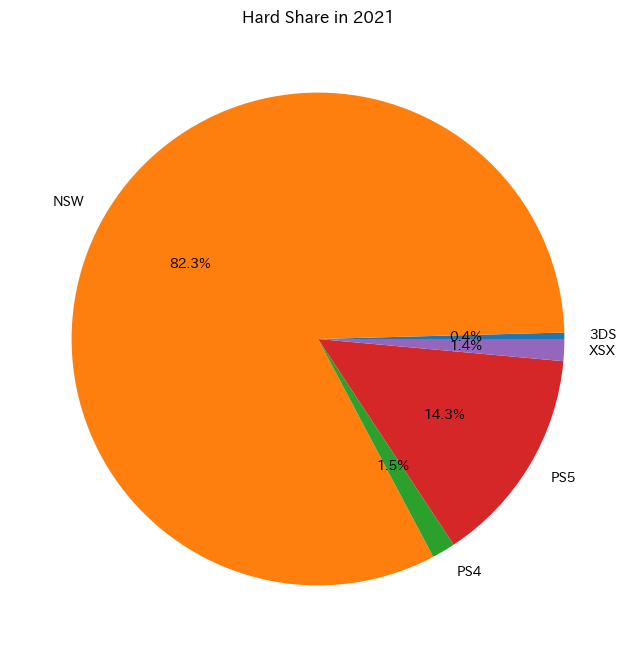

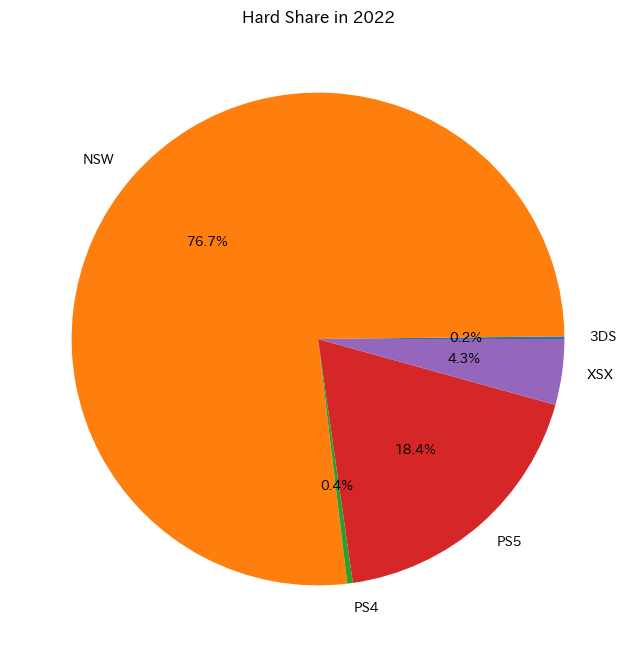

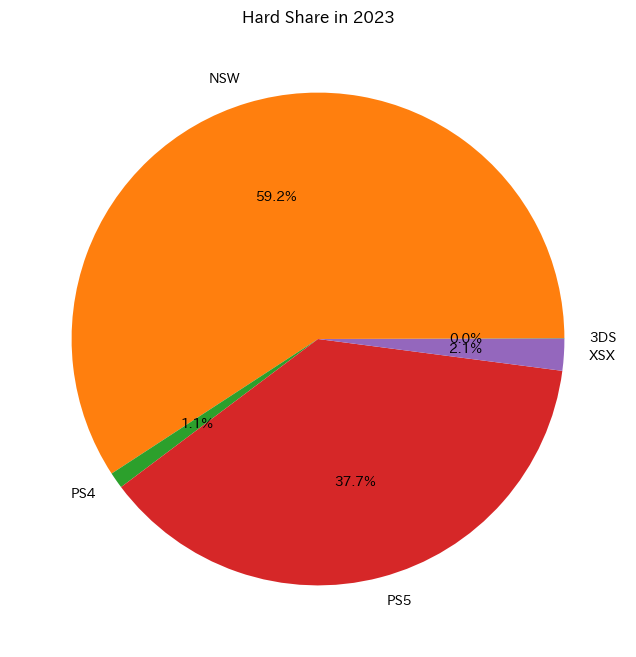

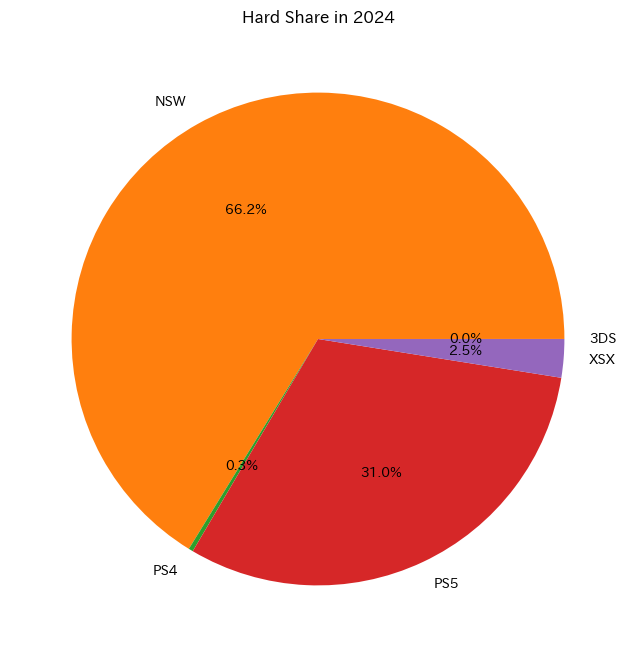

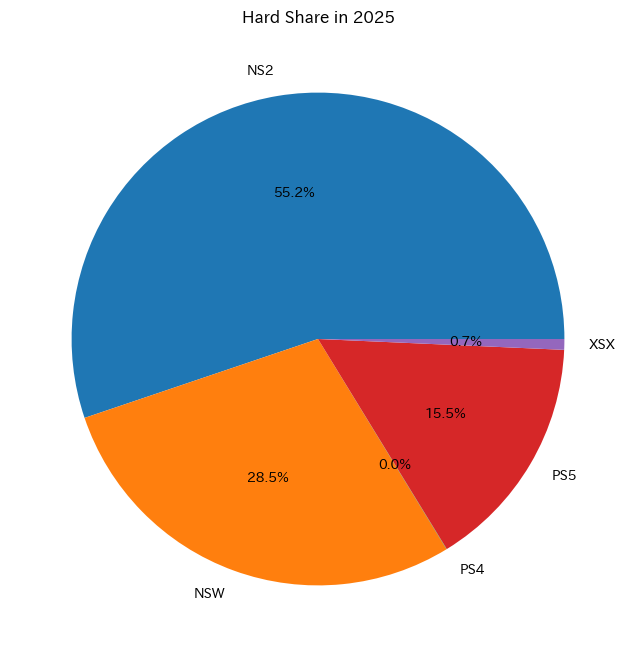

In [52]:
for idx, s in p_sales.iterrows():
    plot_pie_chart_by_year(s)

['red', 'green', 'blue']


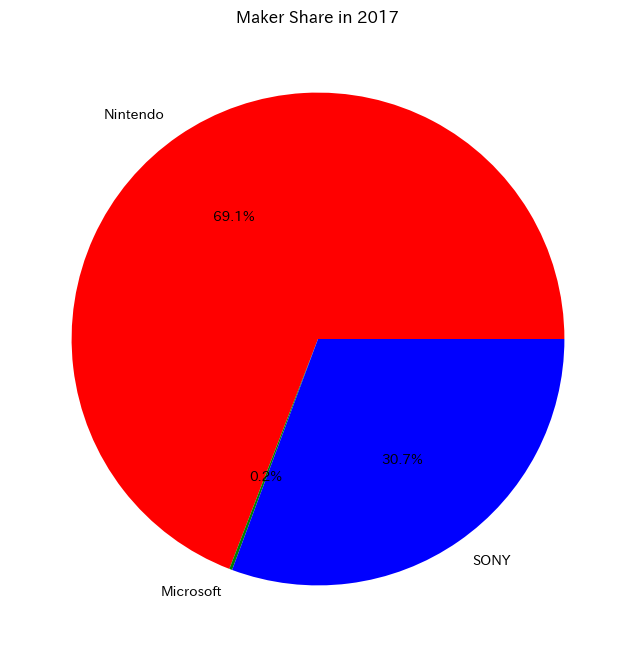

['red', 'green', 'blue']


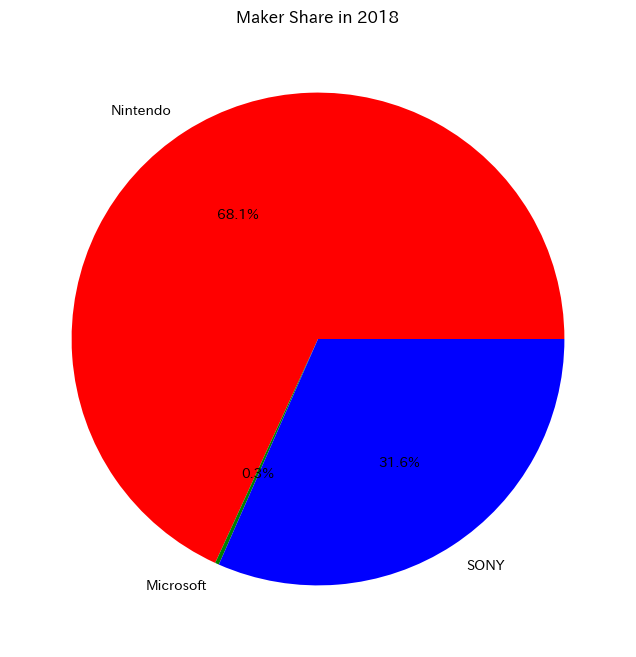

['red', 'green', 'blue']


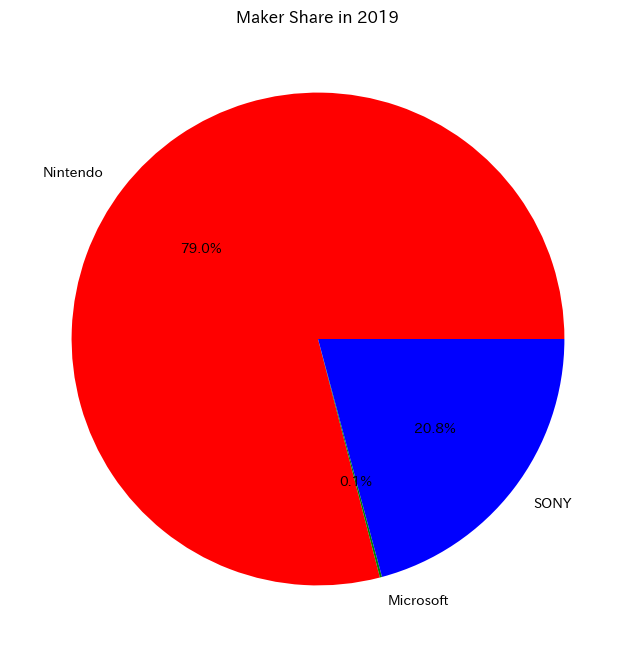

['red', 'green', 'blue']


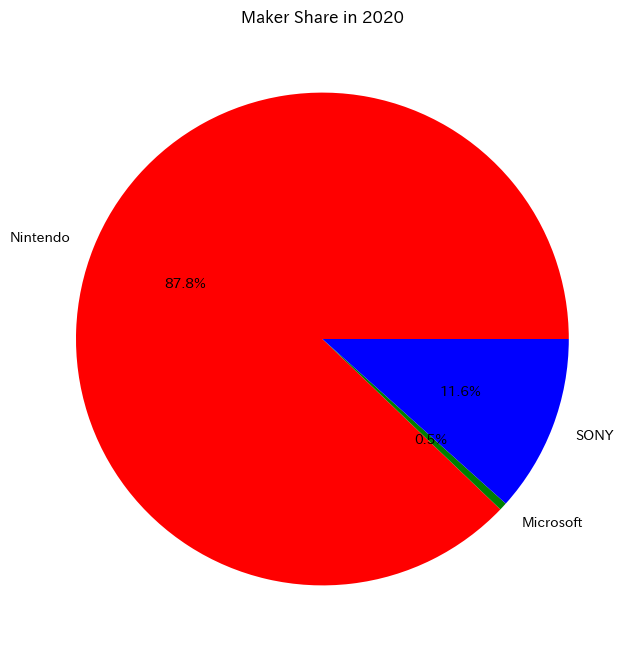

['red', 'green', 'blue']


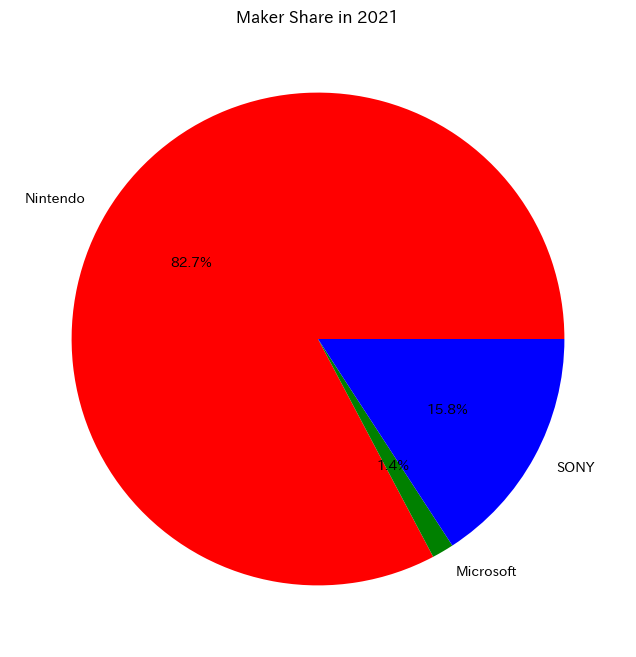

['red', 'green', 'blue']


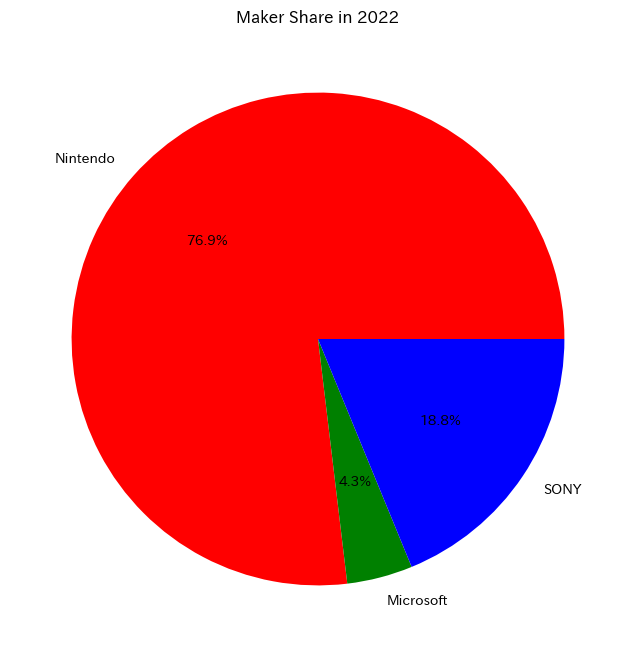

['red', 'green', 'blue']


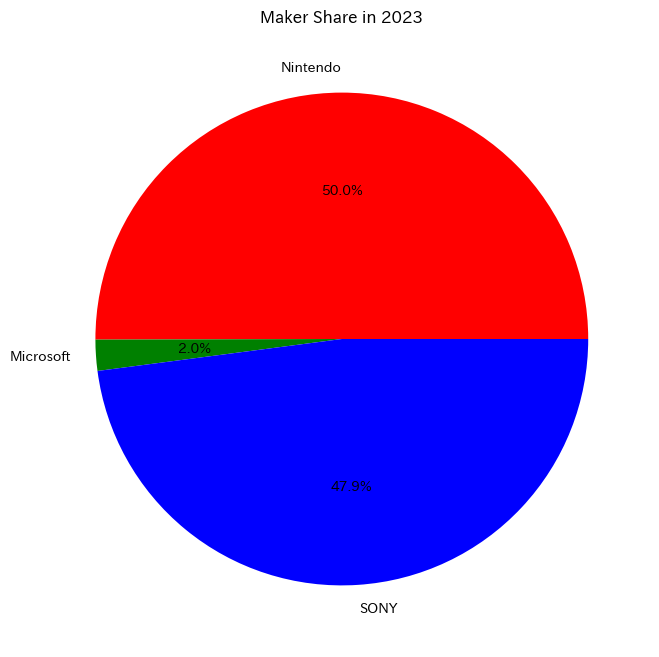

In [ ]:
# 関数を使って、2017年から2022年までの各年のメーカー別シェアを表示
for year in range(2017, 2024):
    plot_pie_chart_by_year(hard_sales, year)


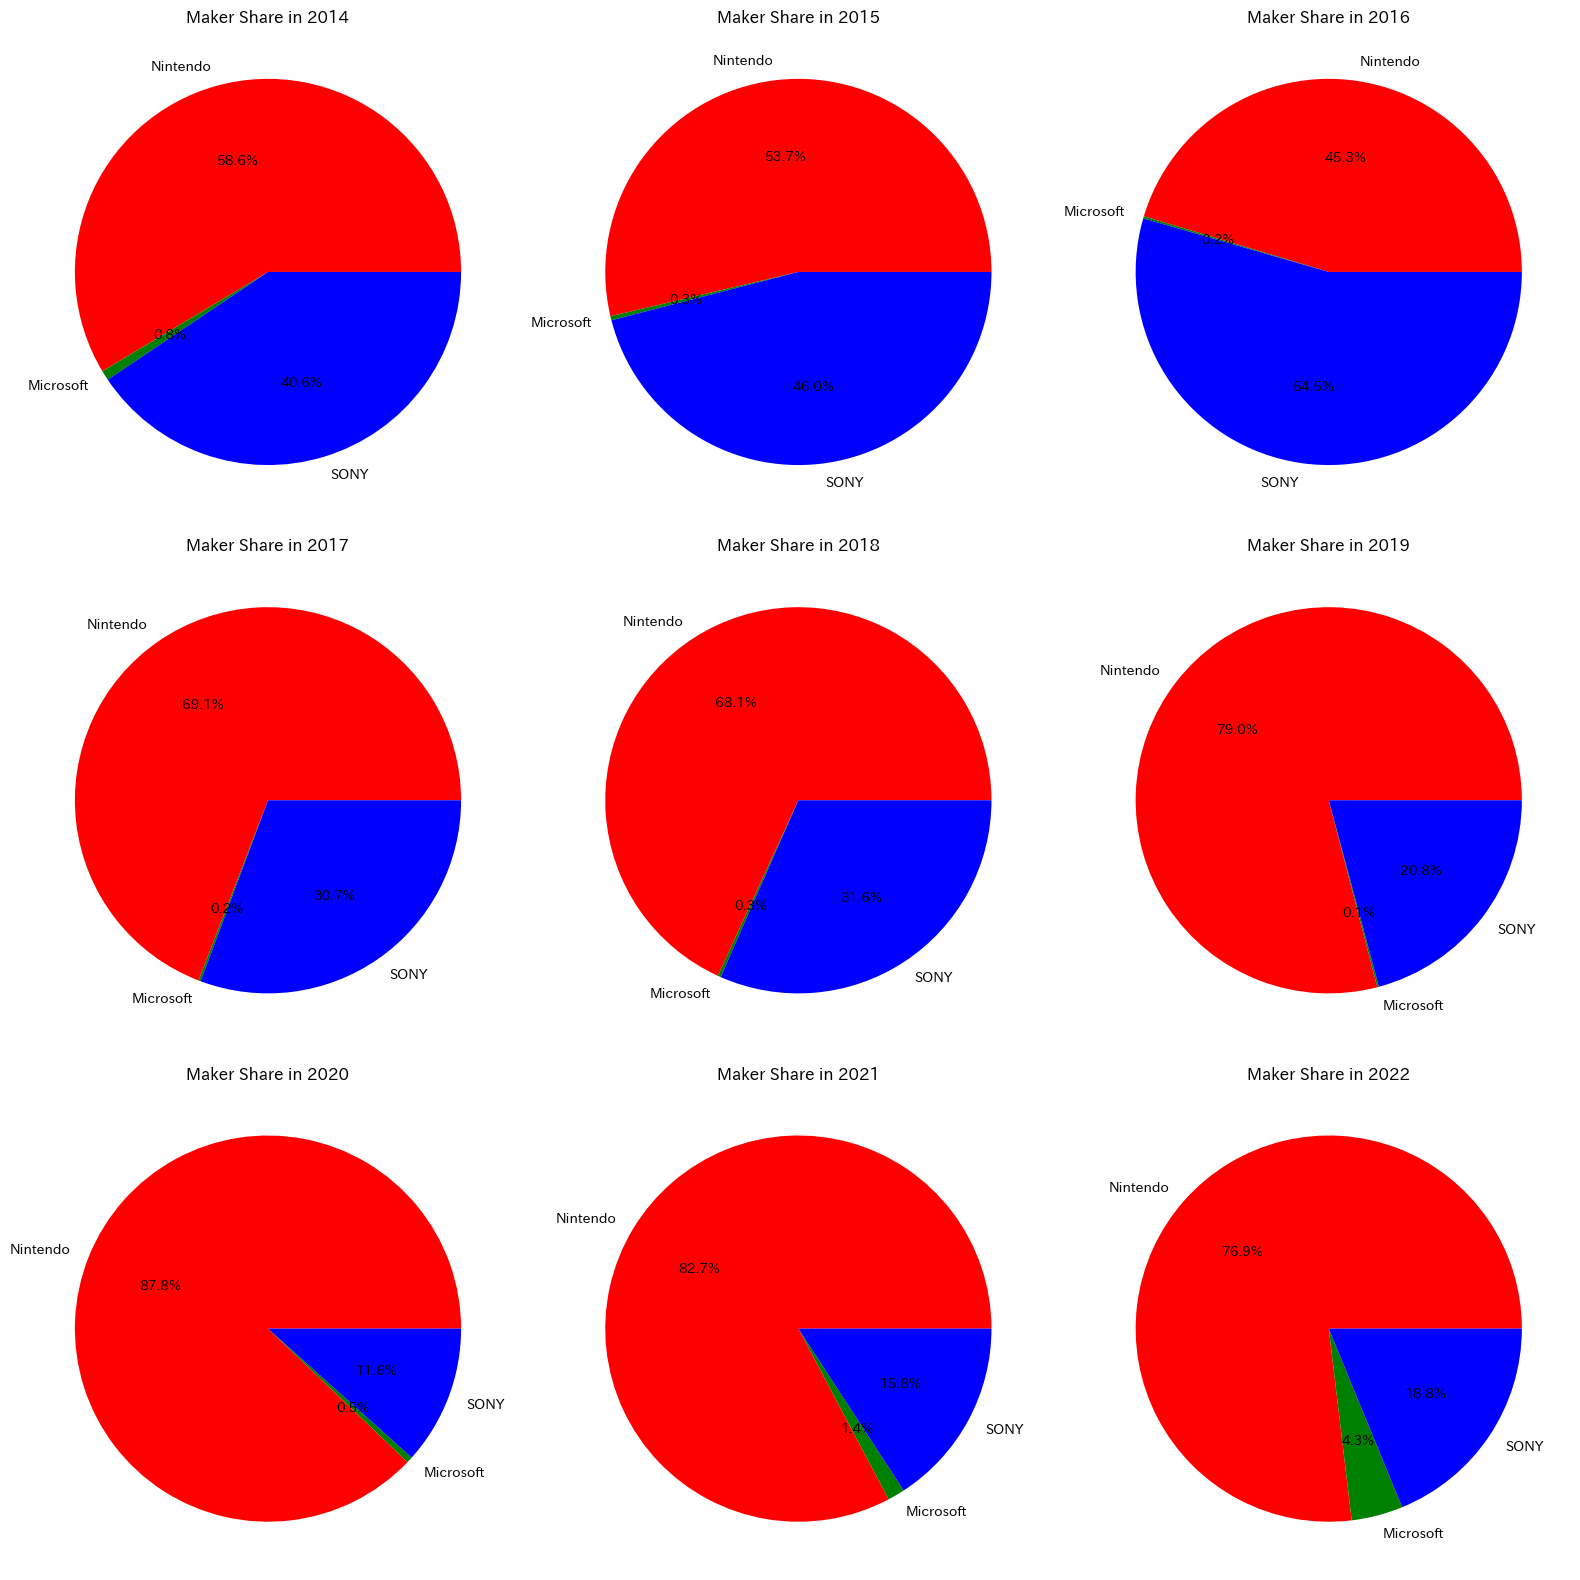

In [18]:
def plot_pie_chart_by_year(df, year, ax):
    yearly_data = df.filter(df["year"] == year)
    maker_sales = yearly_data.groupBy("maker").agg(F.sum("units").alias("yearly_units"))
    maker_sales_pd = maker_sales.toPandas()

    colors = {
        'Nintendo': 'red',
        'SONY': 'blue',
        'Microsoft': 'green'
    }

    color_list = [colors[maker] for maker in maker_sales_pd['maker']]

    ax.pie(maker_sales_pd['yearly_units'], labels=maker_sales_pd['maker'], autopct='%1.1f%%', colors=color_list)
    ax.set_title(f'Maker Share in {year}')

# 各年のメーカー別シェアを表示するためのグリッドを作成
years = list(range(2014, 2023))
n_years = len(years)
n_cols = 3
n_rows = math.ceil(n_years / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 16))
axes = axes.flatten()

# 各年のメーカー別シェアをサブプロットに描画
for i, year in enumerate(years):
    plot_pie_chart_by_year(hard_sales, year, axes[i])

# 余分なサブプロットを削除
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [8]:
hard_sales.show()

+-------+----------+----------+------+----+-----+----------+--------+-------------+-----------+---------+----------+----------+---------+----+
|     hw|begin_date|  end_date| units|year|month|launch_day|   maker|    full_name|launch_year|delta_day|delta_week|delta_year|sum_units|week|
+-------+----------+----------+------+----+-----+----------+--------+-------------+-----------+---------+----------+----------+---------+----+
|     GB|1998-10-12|1998-10-18| 10867|1998|   10|1989-04-21|Nintendo|     GAME BOY|       1989|     3467|       495|         9|    10867|  42|
|    N64|1998-10-12|1998-10-18|  2965|1998|   10|1996-06-23|Nintendo|   NINTENDO64|       1996|      847|       121|         2|     2965|  42|
|     PS|1998-10-12|1998-10-18| 20918|1998|   10|1994-12-03|    SONY|  PlayStation|       1994|     1415|       202|         4|    20918|  42|
| SATURN|1998-10-12|1998-10-18|   858|1998|   10|1994-11-22|    SEGA|  SEGA SATURN|       1994|     1426|       203|         4|      858|  42|

2018
             units
maker             
Nintendo   4048808
Microsoft    15339
SONY       1876955
[<matplotlib.patches.Wedge object at 0x127b83220>, <matplotlib.patches.Wedge object at 0x127b814b0>, <matplotlib.patches.Wedge object at 0x127b80be0>]
[Text(-0.5937536380095146, 0.9259895341473717, 'Nintendo'), Text(-0.450888725238363, -1.0033440872666386, 'Microsoft'), Text(0.6012448485429207, -0.9211431116284812, 'SONY')]
[Text(-0.3238656207324625, 0.5050852004440208, '68.1%'), Text(-0.2459393046754707, -0.5472785930545301, '0.3%'), Text(0.3279517355688658, -0.5024416972518988, '31.6%')]


IndexError: list index out of range

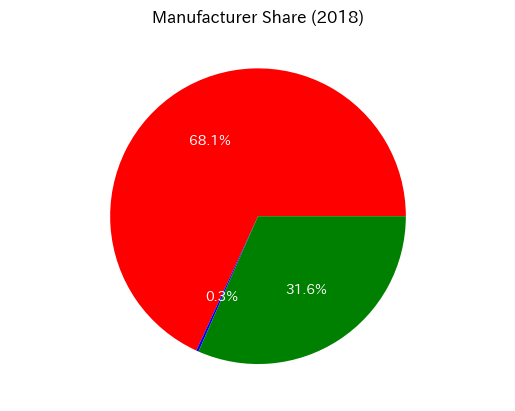

In [13]:
def init_pie_chart(ax):
    ax.clear()
    ax.axis('equal')
    ax.set_title("Manufacturer Share")
    return []

def update_pie_chart(year, df, ax):
    ax.clear()
    ax.axis('equal')
    ax.set_title(f"Manufacturer Share ({year})")

    year_data = df.filter(F.col("year") == year).groupBy("maker").agg(F.sum("units").alias("units"))
    year_data_pd = year_data.toPandas().set_index("maker")
    print(year)
    print(year_data_pd)
    wedges, texts, autotexts = ax.pie(year_data_pd["units"], labels=year_data_pd.index,
                                      autopct="%1.1f%%", colors=["red", "blue", "green"],
                                      textprops=dict(color="w"))
    print(wedges)
    print(texts)
    print(autotexts)
    return wedges, texts, autotexts

def create_animated_pie_chart(df, years, interval=1000, save_path="animated_pie_chart.gif"):
    fig, ax = plt.subplots()
    ani = FuncAnimation(fig, update_pie_chart, frames=years, fargs=(df, ax), init_func=lambda: init_pie_chart(ax), interval=interval, blit=True)
    
    writer = PillowWriter(fps=1)
    ani.save(save_path, writer=writer)
    print(f"アニメーションが {save_path} に保存されました。")

years = list(range(2018, 2023))
create_animated_pie_chart(hard_sales, years)


AttributeError: 'FuncAnimation' object has no attribute '_frames'

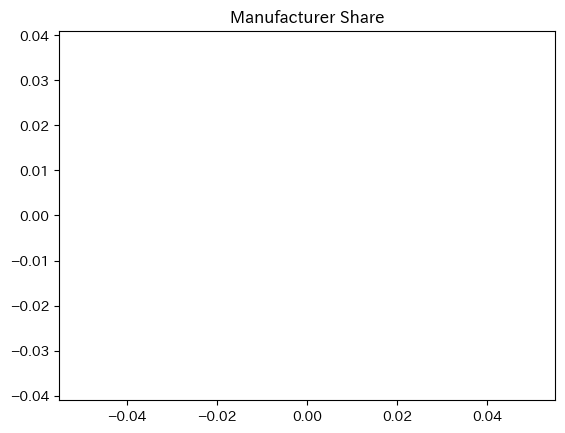

In [7]:
def init_pie_chart(ax):
    ax.clear()
    ax.axis('equal')
    ax.set_title("Manufacturer Share")
    return []

def update_pie_chart(year, df, ax):
    ax.clear()
    ax.axis('equal')
    ax.set_title(f"Manufacturer Share ({year})")
    print(f"Target is {year}")
    year_data = df.filter(F.col("year") == year).groupBy("maker").agg(F.sum("units").alias("units"))
    year_data_pd = year_data.toPandas().set_index("maker")
    print(year_data_pd)
    
    if not year_data_pd.empty:
        wedges, texts, autotexts = ax.pie(year_data_pd["units"], labels=year_data_pd.index,
                                          autopct="%1.1f%%", colors=["red", "blue", "green"],
                                          textprops=dict(color="w"))
    else:
        wedges, texts, autotexts = [], [], []
    
    return wedges, texts, autotexts

def create_animated_pie_chart(df, years, interval=1000, save_path="animated_pie_chart.gif"):
    fig, ax = plt.subplots()
    ani = FuncAnimation(fig, update_pie_chart, frames=years, fargs=(df, ax), init_func=lambda: init_pie_chart(ax), interval=interval, blit=True)
    
    if len(ani._frames) > 0:
        writer = PillowWriter(fps=1)
        ani.save(save_path, writer=writer)
        print(f"アニメーションが {save_path} に保存されました。")
    else:
        print("アニメーションを作成できませんでした。データが不足しています。")

years = list(range(2017, 2023))
create_animated_pie_chart(hard_sales, years)


IndexError: list index out of range

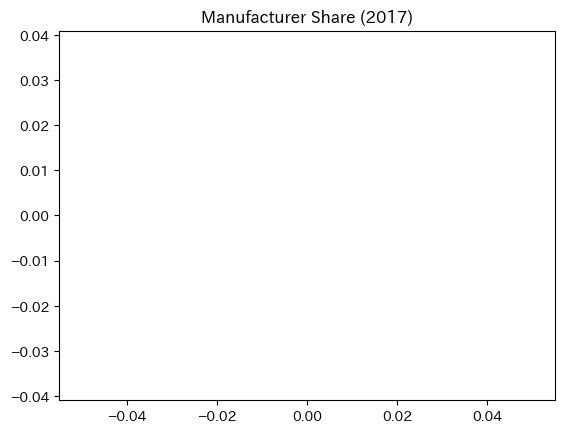

In [26]:
years = list(range(2017, 2023))
create_animated_pie_chart(hard_sales, years)